1. ID: ID Number of Customers.

2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

6. Cost of the product: Cost of the Product in US Dollars.

7. Prior purchases: The Number of Prior Purchase.

8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.

9. Gender: Male and Female.

10. Discount offered: Discount offered on that specific product.

11. Weight in gms: It is the weight in grams.

12. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Ecomm_data_new.csv')
df1 = df.copy(deep = True)
df2 = df.copy(deep = True)

In [ ]:
df1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,bad,177.0,3,low,F,44.0,1233,yes
1,2,F,Flight,4,excellent,216.0,2,low,M,59.0,3088,yes
2,3,A,Flight,2,bad,183.0,4,low,M,NaN,3374,yes
3,4,B,Flight,3,ok,176.0,4,medium,M,10.0,1177,yes
4,5,C,Flight,2,bad,184.0,3,medium,F,46.0,2484,yes


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10996 non-null  object 
 2   Mode_of_Shipment     10997 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10995 non-null  object 
 5   Cost_of_the_Product  10994 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10995 non-null  object 
 8   Gender               10997 non-null  object 
 9   Discount_offered     10997 non-null  float64
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [ ]:
df1.describe()

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10994.000000,10999.000000,10997.000000,10999.000000
mean,5500.00000,4.054459,210.192741,3.567597,13.370283,3634.016729
std,3175.28214,1.141490,48.063145,1.522860,16.203620,1635.377251
min,1.00000,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,310.000000,10.000000,65.000000,7846.000000


In [ ]:
df1.isnull().sum()

ID                     0
Warehouse_block        3
Mode_of_Shipment       2
Customer_care_calls    0
Customer_rating        4
Cost_of_the_Product    5
Prior_purchases        0
Product_importance     4
Gender                 2
Discount_offered       2
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df1.drop(['ID'], axis = 1, inplace = True)

Separate the data into numerical and categorical

In [ ]:
num = df1.select_dtypes(include = 'number')
cat = df1.select_dtypes(include = 'object')

Remove high NaN value features

In [ ]:
# TO FIND OUT THE COLUMNS CONTAINING NAN VALUES
nan_feat = [cname for cname in df1.columns if df1[cname].isnull().sum() >= 1]

# TO FIND OUT THE % OF NAN 
for i in nan_feat:
    print(i, np.round(df1[i].isnull().mean(), 2))

Warehouse_block 0.0
Mode_of_Shipment 0.0
Customer_rating 0.0
Cost_of_the_Product 0.0
Product_importance 0.0
Gender 0.0
Discount_offered 0.0


Remove low variance features

In [ ]:
list1 = []
for i in cat.columns:
    list1.append((i, pd.crosstab(cat[i], columns = 'counts', normalize = True)))

In [ ]:
list1

[('Warehouse_block',
  col_0              counts
  Warehouse_block          
  A                0.166697
  B                0.166697
  C                0.166606
  D                0.166788
  F                0.333212),
 ('Mode_of_Shipment',
  col_0               counts
  Mode_of_Shipment          
  Flight            0.161408
  Road              0.160044
  Ship              0.678549),
 ('Customer_rating',
  col_0              counts
  Customer_rating          
  bad              0.196817
  excellent        0.197453
  good             0.199000
  ok               0.203638
  worst            0.203092),
 ('Product_importance',
  col_0                 counts
  Product_importance          
  high                0.086130
  low                 0.481583
  medium              0.432287),
 ('Gender',
  col_0     counts
  Gender          
  F       0.504047
  M       0.495953),
 ('Reached.on.Time_Y.N',
  col_0                  counts
  Reached.on.Time_Y.N          
  no                   0.403309
 

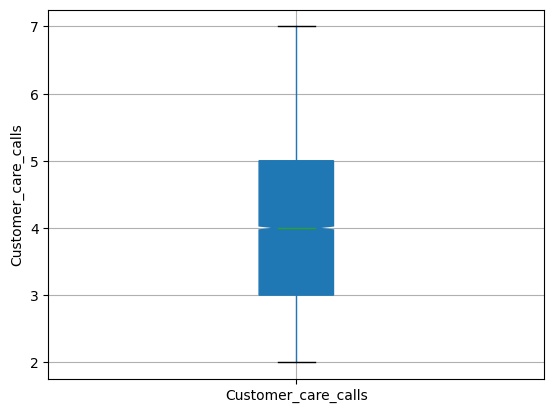

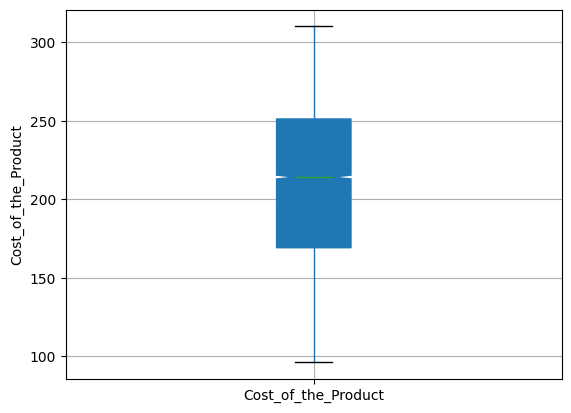

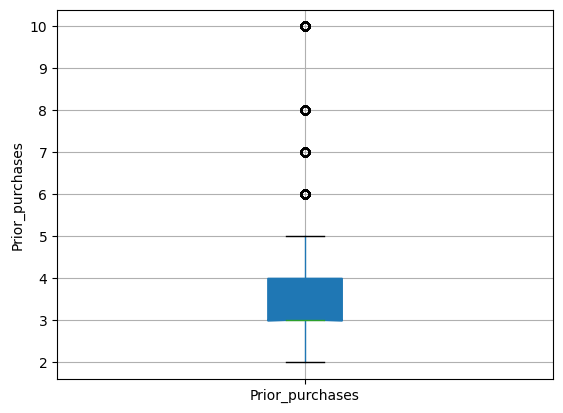

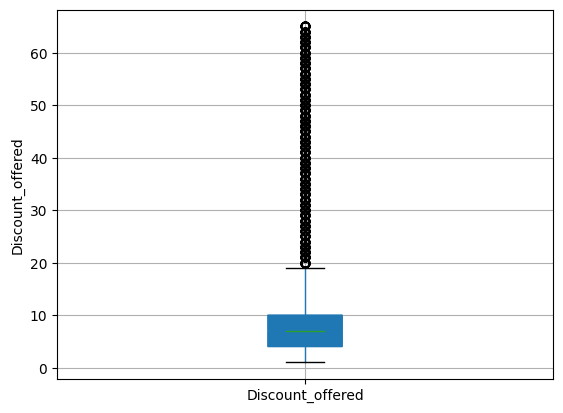

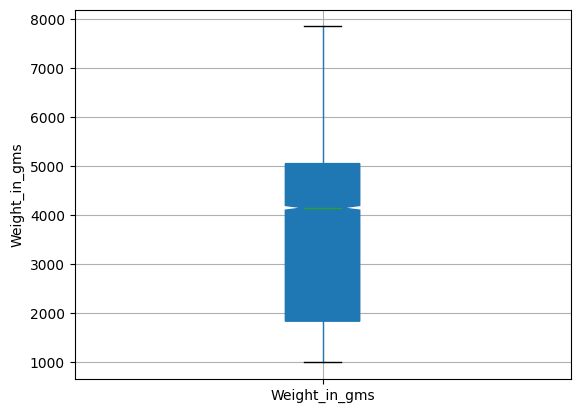

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in num:
  num.boxplot(column = i, patch_artist = True, notch = True)
  plt.ylabel(i)
  plt.show()

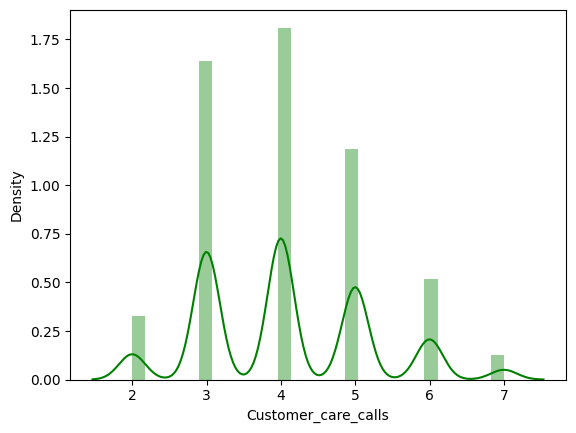

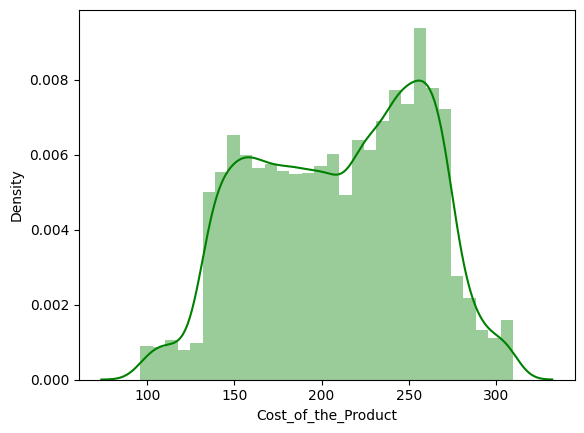

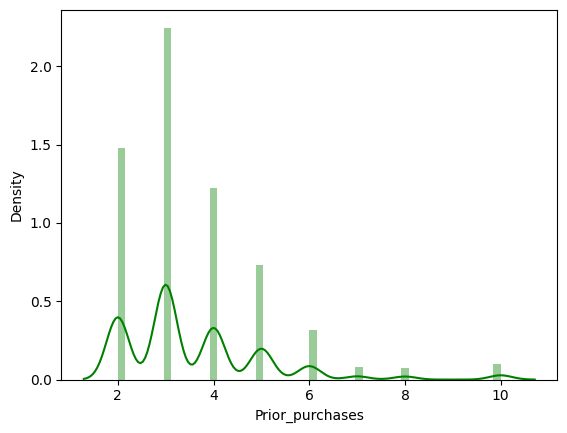

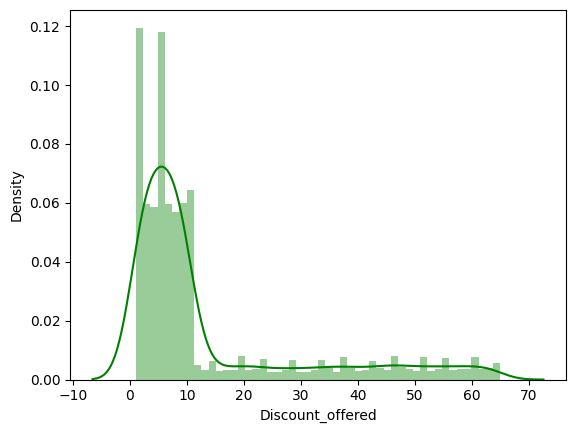

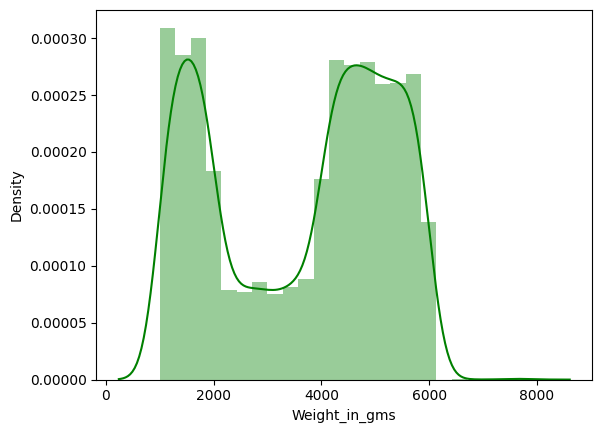

In [ ]:
for i in num:
  sns.distplot(df1[i], kde = True, color = 'green')
  plt.show()

In [ ]:
# sns.scatterplot(x = df1['Reached.on.Time_Y.N'], y = df1['Weight_in_gms'], palette = 'pastel')

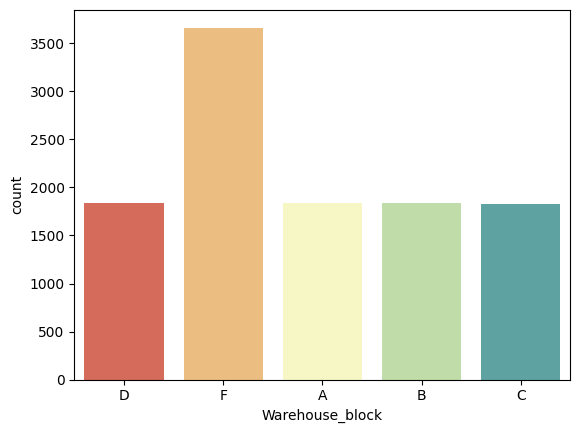

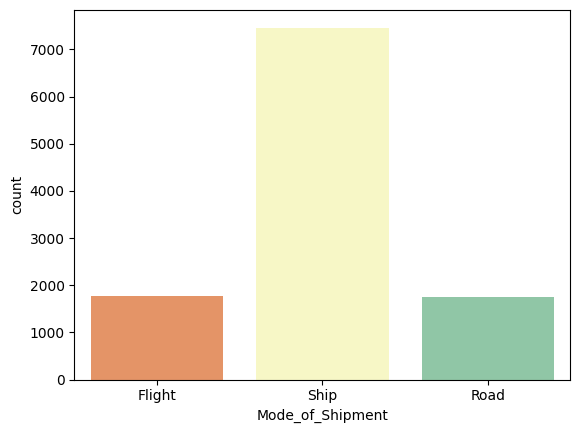

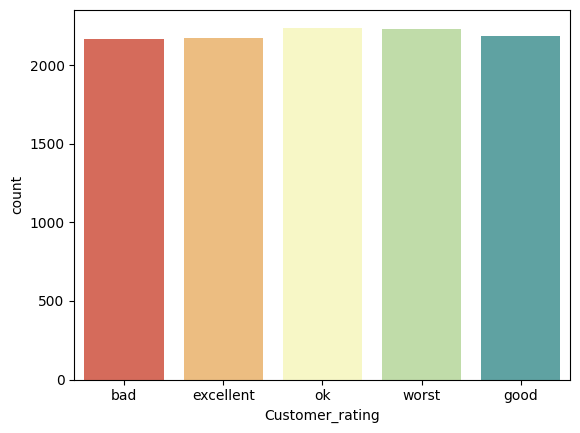

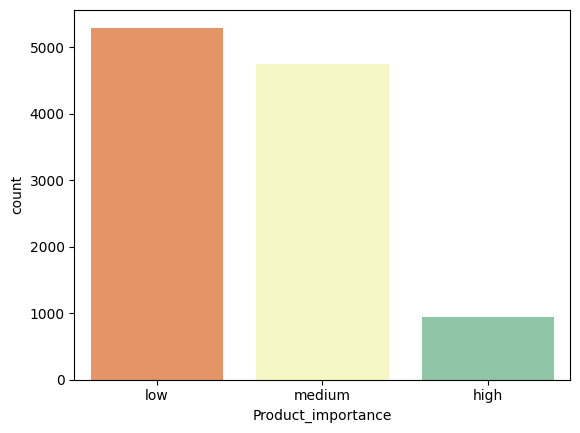

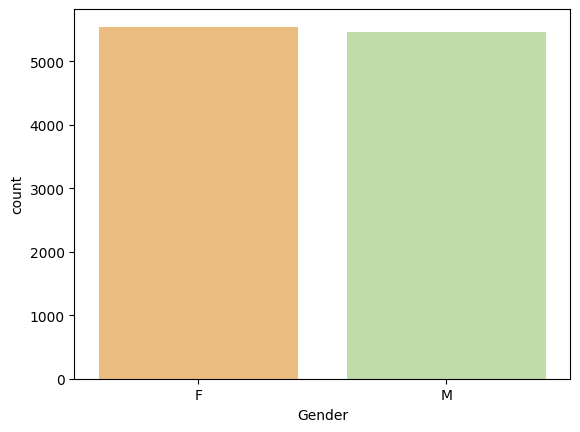

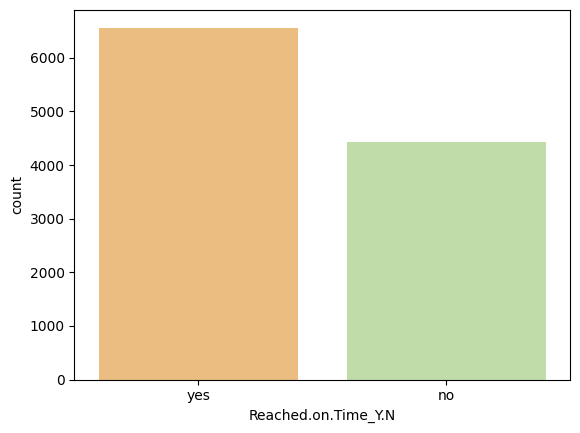

In [ ]:
for i in cat:
  sns.countplot(x = df1[i], palette = 'Spectral')
  plt.show()

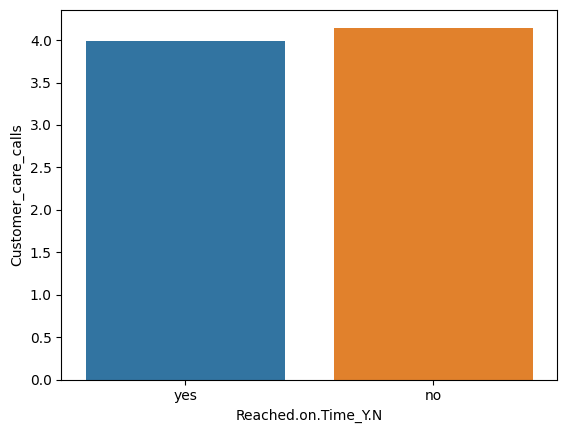

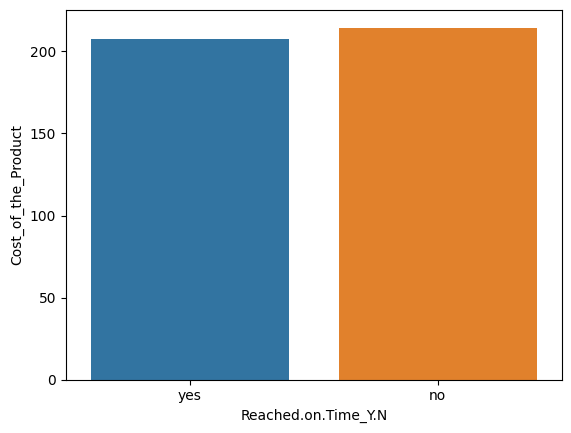

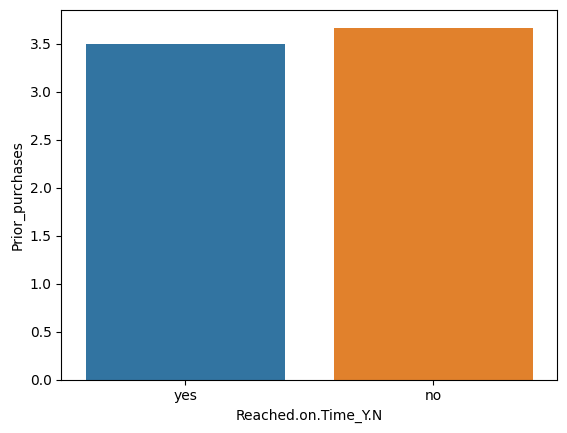

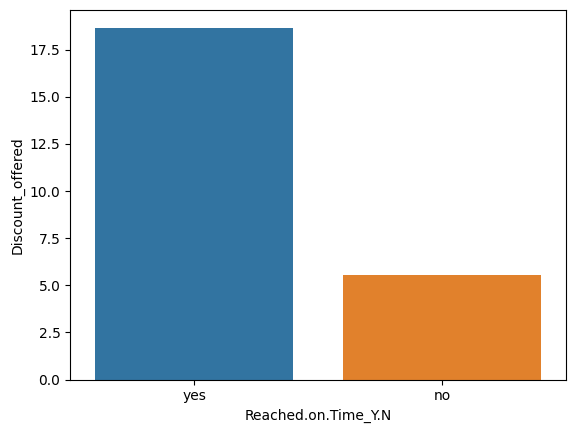

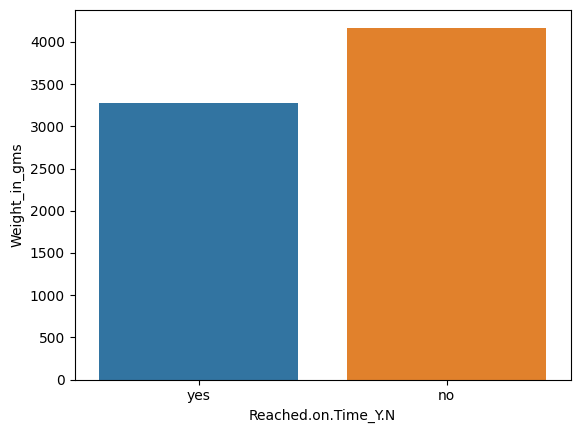

In [ ]:
for i in num:
  sns.barplot(x = df1['Reached.on.Time_Y.N'], y = df1[i], ci = 0)
  plt.show()

In [ ]:
df1[df1.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [ ]:
df1.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df1[df1.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [ ]:
x = df1.drop(['Reached.on.Time_Y.N'], axis = 1)
y = df1['Reached.on.Time_Y.N']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 69, stratify = y)

In [ ]:
train_num = train_x.select_dtypes(include = 'number')
train_cat = train_x.select_dtypes(include = 'object')

test_num = test_x.select_dtypes(include = 'number')
test_cat = test_x.select_dtypes(include = 'object')

In [ ]:
print('Missing values before imputation \n', train_cat.isnull().sum())
train_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat.isnull().sum())

Missing values before imputation 
 Warehouse_block       3
Mode_of_Shipment      2
Customer_rating       3
Product_importance    3
Gender                2
dtype: int64


Missing values after imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
Gender                0
dtype: int64


In [ ]:
print('Missing values before imputation \n', train_num.isnull().sum())
train_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num.isnull().sum())

Missing values before imputation 
 Customer_care_calls    0
Cost_of_the_Product    5
Prior_purchases        0
Discount_offered       2
Weight_in_gms          0
dtype: int64


Missing values after imputation 
 Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [ ]:
print('Missing values before imputation \n', test_cat.isnull().sum())
test_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat.isnull().sum())

Missing values before imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       1
Product_importance    1
Gender                0
dtype: int64


Missing values after imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
Gender                0
dtype: int64


In [ ]:
print('Missing values before imputation \n', test_num.isnull().sum())
test_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num.isnull().sum())

Missing values before imputation 
 Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


Missing values after imputation 
 Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [ ]:
train_num.reset_index(inplace = True, drop = True)
train_cat.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)
test_cat.reset_index(inplace = True, drop = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train_y)
train_y = enc.transform(train_y)
test_y = enc.transform(test_y)

In [ ]:
train_y

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
list(enc.inverse_transform(train_y))

['yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'y

In [ ]:
train_cat

,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender
0,B,Flight,bad,medium,M
1,F,Ship,bad,medium,M
2,C,Ship,bad,low,M
3,B,Flight,bad,medium,M
4,F,Ship,good,medium,M
...,...,...,...,...,...
8794,D,Ship,excellent,low,M
8795,F,Ship,excellent,low,F
8796,F,Ship,bad,low,M
8797,F,Ship,good,medium,F


In [ ]:
train_ord_features = train_cat[['Customer_rating', 'Product_importance']]
test_ord_features = test_cat[['Customer_rating', 'Product_importance']]

In [ ]:
train_nom_features = train_cat.drop(['Customer_rating', 'Product_importance'], axis = 1)
test_nom_features = test_cat.drop(['Customer_rating', 'Product_importance'], axis = 1)

In [ ]:
train_ord_features

,Customer_rating,Product_importance
0,bad,medium
1,bad,medium
2,bad,low
3,bad,medium
4,good,medium
...,...,...
8794,excellent,low
8795,excellent,low
8796,bad,low
8797,good,medium


In [ ]:
train_nom_features

,Warehouse_block,Mode_of_Shipment,Gender
0,B,Flight,M
1,F,Ship,M
2,C,Ship,M
3,B,Flight,M
4,F,Ship,M
...,...,...,...
8794,D,Ship,M
8795,F,Ship,F
8796,F,Ship,M
8797,F,Ship,F


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# ordinal = OrdinalEncoder(categories = [['worst', 'bad', 'ok', 'good', 'excellent']])
# train_cat['Customer_rating'] = ordinal.fit_transform(train_cat[['Customer_rating']])
# test_cat['Customer_rating'] = ordinal.transform(test_cat[['Customer_rating']])

ordinal = OrdinalEncoder(categories = [['worst', 'bad', 'ok', 'good', 'excellent'], ['low', 'medium', 'high']])
ordinal.fit(train_ord_features[['Customer_rating', 'Product_importance']])
train_ord_features[['Customer_rating', 'Product_importance']] = ordinal.transform(train_ord_features[['Customer_rating', 'Product_importance']])
test_ord_features[['Customer_rating', 'Product_importance']] = ordinal.transform(test_ord_features[['Customer_rating', 'Product_importance']])

In [ ]:
train_ord_features

,Customer_rating,Product_importance
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0
4,3.0,1.0
...,...,...
8794,4.0,0.0
8795,4.0,0.0
8796,1.0,0.0
8797,3.0,1.0


In [ ]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
ohe.fit(train_nom_features)
train_nom_features = pd.DataFrame(ohe.transform(train_nom_features), columns = ohe.get_feature_names_out())
test_nom_features = pd.DataFrame(ohe.transform(test_nom_features), columns = ohe.get_feature_names_out())

In [ ]:
train_nom_features

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8794,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
train_cat = pd.concat([train_ord_features, train_nom_features], axis = 1)
test_cat = pd.concat([test_ord_features, test_nom_features], axis = 1) 

In [ ]:
train_num

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,6,256.0,3,1.0,4435
1,3,160.0,10,25.0,1548
2,4,237.0,3,2.0,5277
3,6,229.0,3,13.0,2322
4,4,161.0,2,59.0,1941
...,...,...,...,...,...
8794,4,226.0,2,10.0,4706
8795,4,135.0,3,3.0,4760
8796,6,164.0,4,6.0,5264
8797,4,209.0,2,3.0,4407


In [ ]:
train_x1 = pd.concat([train_num, train_cat], axis = 1)
test_x1 = pd.concat([test_num, test_cat], axis = 1) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x1)
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns = train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns = test_x1.columns)

In [ ]:
train_x1.isnull().sum()

Customer_care_calls        0
Cost_of_the_Product        0
Prior_purchases            0
Discount_offered           0
Weight_in_gms              0
Customer_rating            0
Product_importance         0
Warehouse_block_A          0
Warehouse_block_B          0
Warehouse_block_C          0
Warehouse_block_D          0
Warehouse_block_F          0
Mode_of_Shipment_Flight    0
Mode_of_Shipment_Road      0
Mode_of_Shipment_Ship      0
Gender_F                   0
Gender_M                   0
dtype: int64

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_x1.isnull().sum()

Customer_care_calls        0
Cost_of_the_Product        0
Prior_purchases            0
Discount_offered           0
Weight_in_gms              0
Customer_rating            0
Product_importance         0
Warehouse_block_A          0
Warehouse_block_B          0
Warehouse_block_C          0
Warehouse_block_D          0
Warehouse_block_F          0
Mode_of_Shipment_Flight    0
Mode_of_Shipment_Road      0
Mode_of_Shipment_Ship      0
Gender_F                   0
Gender_M                   0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()
model5 = SVC()
model6 = xgb.XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score

model1.fit(train_x1, train_y)
pred1 = model1.predict(test_x1)

c_matrix1 = confusion_matrix(test_y, pred1)
acc1 = accuracy_score(test_y, pred1)

print('confusion matrix is: \n', c_matrix1, '\n', 'and accuracy is: \n', acc1)

confusion matrix is: 
 [[523 364]
 [421 892]] 
 and accuracy is: 
 0.6431818181818182


In [ ]:
prec = precision_score(test_y, pred1)
recall = recall_score(test_y, pred1)
f1 = f1_score(test_y, pred1)
print('precision, recall and f1 score are: \n', prec, recall, f1)

precision, recall and f1 score are: 
 0.7101910828025477 0.6793602437166794 0.694433631763332


In [ ]:
model2.fit(train_x1, train_y)
pred2 = model2.predict(test_x1)

c_matrix2 = confusion_matrix(test_y, pred2)
acc2 = accuracy_score(test_y, pred2)

print('confusion matrix is: \n', c_matrix2, 'and accuracy is: \n', acc2)

confusion matrix is: 
 [[486 401]
 [404 909]] and accuracy is: 
 0.634090909090909


In [ ]:
model3.fit(train_x1, train_y)
pred3 = model3.predict(test_x1)

c_matrix3 = confusion_matrix(test_y, pred3)
acc3 = accuracy_score(test_y, pred3)

print('confusion matrix is: \n', c_matrix3, 'and accuracy is: \n', acc3)

confusion matrix is: 
 [[613 274]
 [500 813]] and accuracy is: 
 0.6481818181818182


In [ ]:
model4.fit(train_x1, train_y)
pred4 = model4.predict(test_x1)

c_matrix4 = confusion_matrix(test_y, pred4)
acc4 = accuracy_score(test_y, pred4)

print('confusion matrix is: \n', c_matrix4, 'and accuracy is: \n', acc4)

confusion matrix is: 
 [[529 358]
 [444 869]] and accuracy is: 
 0.6354545454545455


In [ ]:
model5.fit(train_x1, train_y)
pred5 = model5.predict(test_x1)

c_matrix5 = confusion_matrix(test_y, pred5)
acc5 = accuracy_score(test_y, pred5)

print('confusion matrix is: \n', c_matrix5, 'and accuracy is: \n', acc5)

confusion matrix is: 
 [[633 254]
 [520 793]] and accuracy is: 
 0.6481818181818182


In [ ]:
model6.fit(train_x1, train_y)
pred6 = model6.predict(test_x1)

c_matrix6 = confusion_matrix(test_y, pred6)
acc6 = accuracy_score(test_y, pred6)

print('confusion matrix is: \n', c_matrix6, 'and accuracy is: \n', acc6)

confusion matrix is: 
 [[584 303]
 [439 874]] and accuracy is: 
 0.6627272727272727


HP TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

DTC_params = [{'criterion': ['gini', 'entropy'], 'max_depth': [3, 6, 9]}]

dtc = GridSearchCV(model2, DTC_params, cv = 5, scoring='accuracy')
dtc.fit(train_x1, train_y)

print(dtc.best_params_)
print((dtc.best_score_))

{'criterion': 'gini', 'max_depth': 6}
0.6846231071373198


In [ ]:
RFC_params = [{'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 6, 9, 12, 15]}]

rfc = GridSearchCV(model3, RFC_params, cv = 5, scoring='accuracy')
rfc.fit(train_x1, train_y)

print(rfc.best_params_)
print((rfc.best_score_))

{'max_depth': 6, 'n_estimators': 200}
0.6830323272520543


In [ ]:
KNC_params = [{'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}]

knc = GridSearchCV(model4, KNC_params, cv = 5, scoring='accuracy')
knc.fit(train_x1, train_y)

print(knc.best_params_)
print((knc.best_score_))

{'n_neighbors': 10, 'weights': 'distance'}
0.6359805416300583


In [ ]:
SVC_params = [{'C': [0.1, 0.2, 0.3, 0.4], 'kernel': ['linear', 'poly', 'rbf']}]

svc = GridSearchCV(model5, SVC_params, cv = 5, scoring='accuracy')
svc.fit(train_x1, train_y)

print(svc.best_params_)
print((svc.best_score_))

{'C': 0.1, 'kernel': 'linear'}
0.6638258437128532


In [ ]:
XGBC_params = [{'eta': [0.1, 0.2, 0.3], 'n_estimators' : [10, 50, 100], 'max_depth': [3, 6, 9]}]

xgbc = GridSearchCV(model6, XGBC_params, cv = 5, scoring='accuracy')
xgbc.fit(train_x1, train_y)

print(xgbc.best_params_)
print((xgbc.best_score_))

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 10}
0.688373430151429


Feature Selection

In [ ]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
ID,1.000000,0.188998,0.197118,0.145369,-0.598252,0.278312
Customer_care_calls,0.188998,1.000000,0.323278,0.180771,-0.130464,-0.276615
Cost_of_the_Product,0.197118,0.323278,1.000000,0.123627,-0.138299,-0.132673
Prior_purchases,0.145369,0.180771,0.123627,1.000000,-0.082848,-0.168213
Discount_offered,-0.598252,-0.130464,-0.138299,-0.082848,1.000000,-0.376149
Weight_in_gms,0.278312,-0.276615,-0.132673,-0.168213,-0.376149,1.000000


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func = chi2, k = 10)
selector.fit(train_x1, train_y)
train_x1.columns[selector.get_support()]

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Customer_rating',
       'Product_importance', 'Warehouse_block_A', 'Warehouse_block_F',
       'Mode_of_Shipment_Road'],
      dtype='object')

In [ ]:
rf_model = RandomForestClassifier(random_state=69)

rf_model.fit(train_x1, train_y)

RandomForestClassifier(random_state=69)

In [ ]:
feature_scores = pd.Series(rf_model.feature_importances_, index=train_x1.columns).sort_values(ascending=False)

In [ ]:
feature_scores[:10]

Weight_in_gms            0.273369
Discount_offered         0.218942
Cost_of_the_Product      0.169980
Prior_purchases          0.063334
Customer_rating          0.059715
Customer_care_calls      0.055604
Product_importance       0.033288
Warehouse_block_F        0.015252
Mode_of_Shipment_Ship    0.013603
Gender_M                 0.013481
dtype: float64

In [ ]:
feature_scores.index[:10]

Index(['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product',
       'Prior_purchases', 'Customer_rating', 'Customer_care_calls',
       'Product_importance', 'Warehouse_block_F', 'Mode_of_Shipment_Ship',
       'Gender_M'],
      dtype='object')

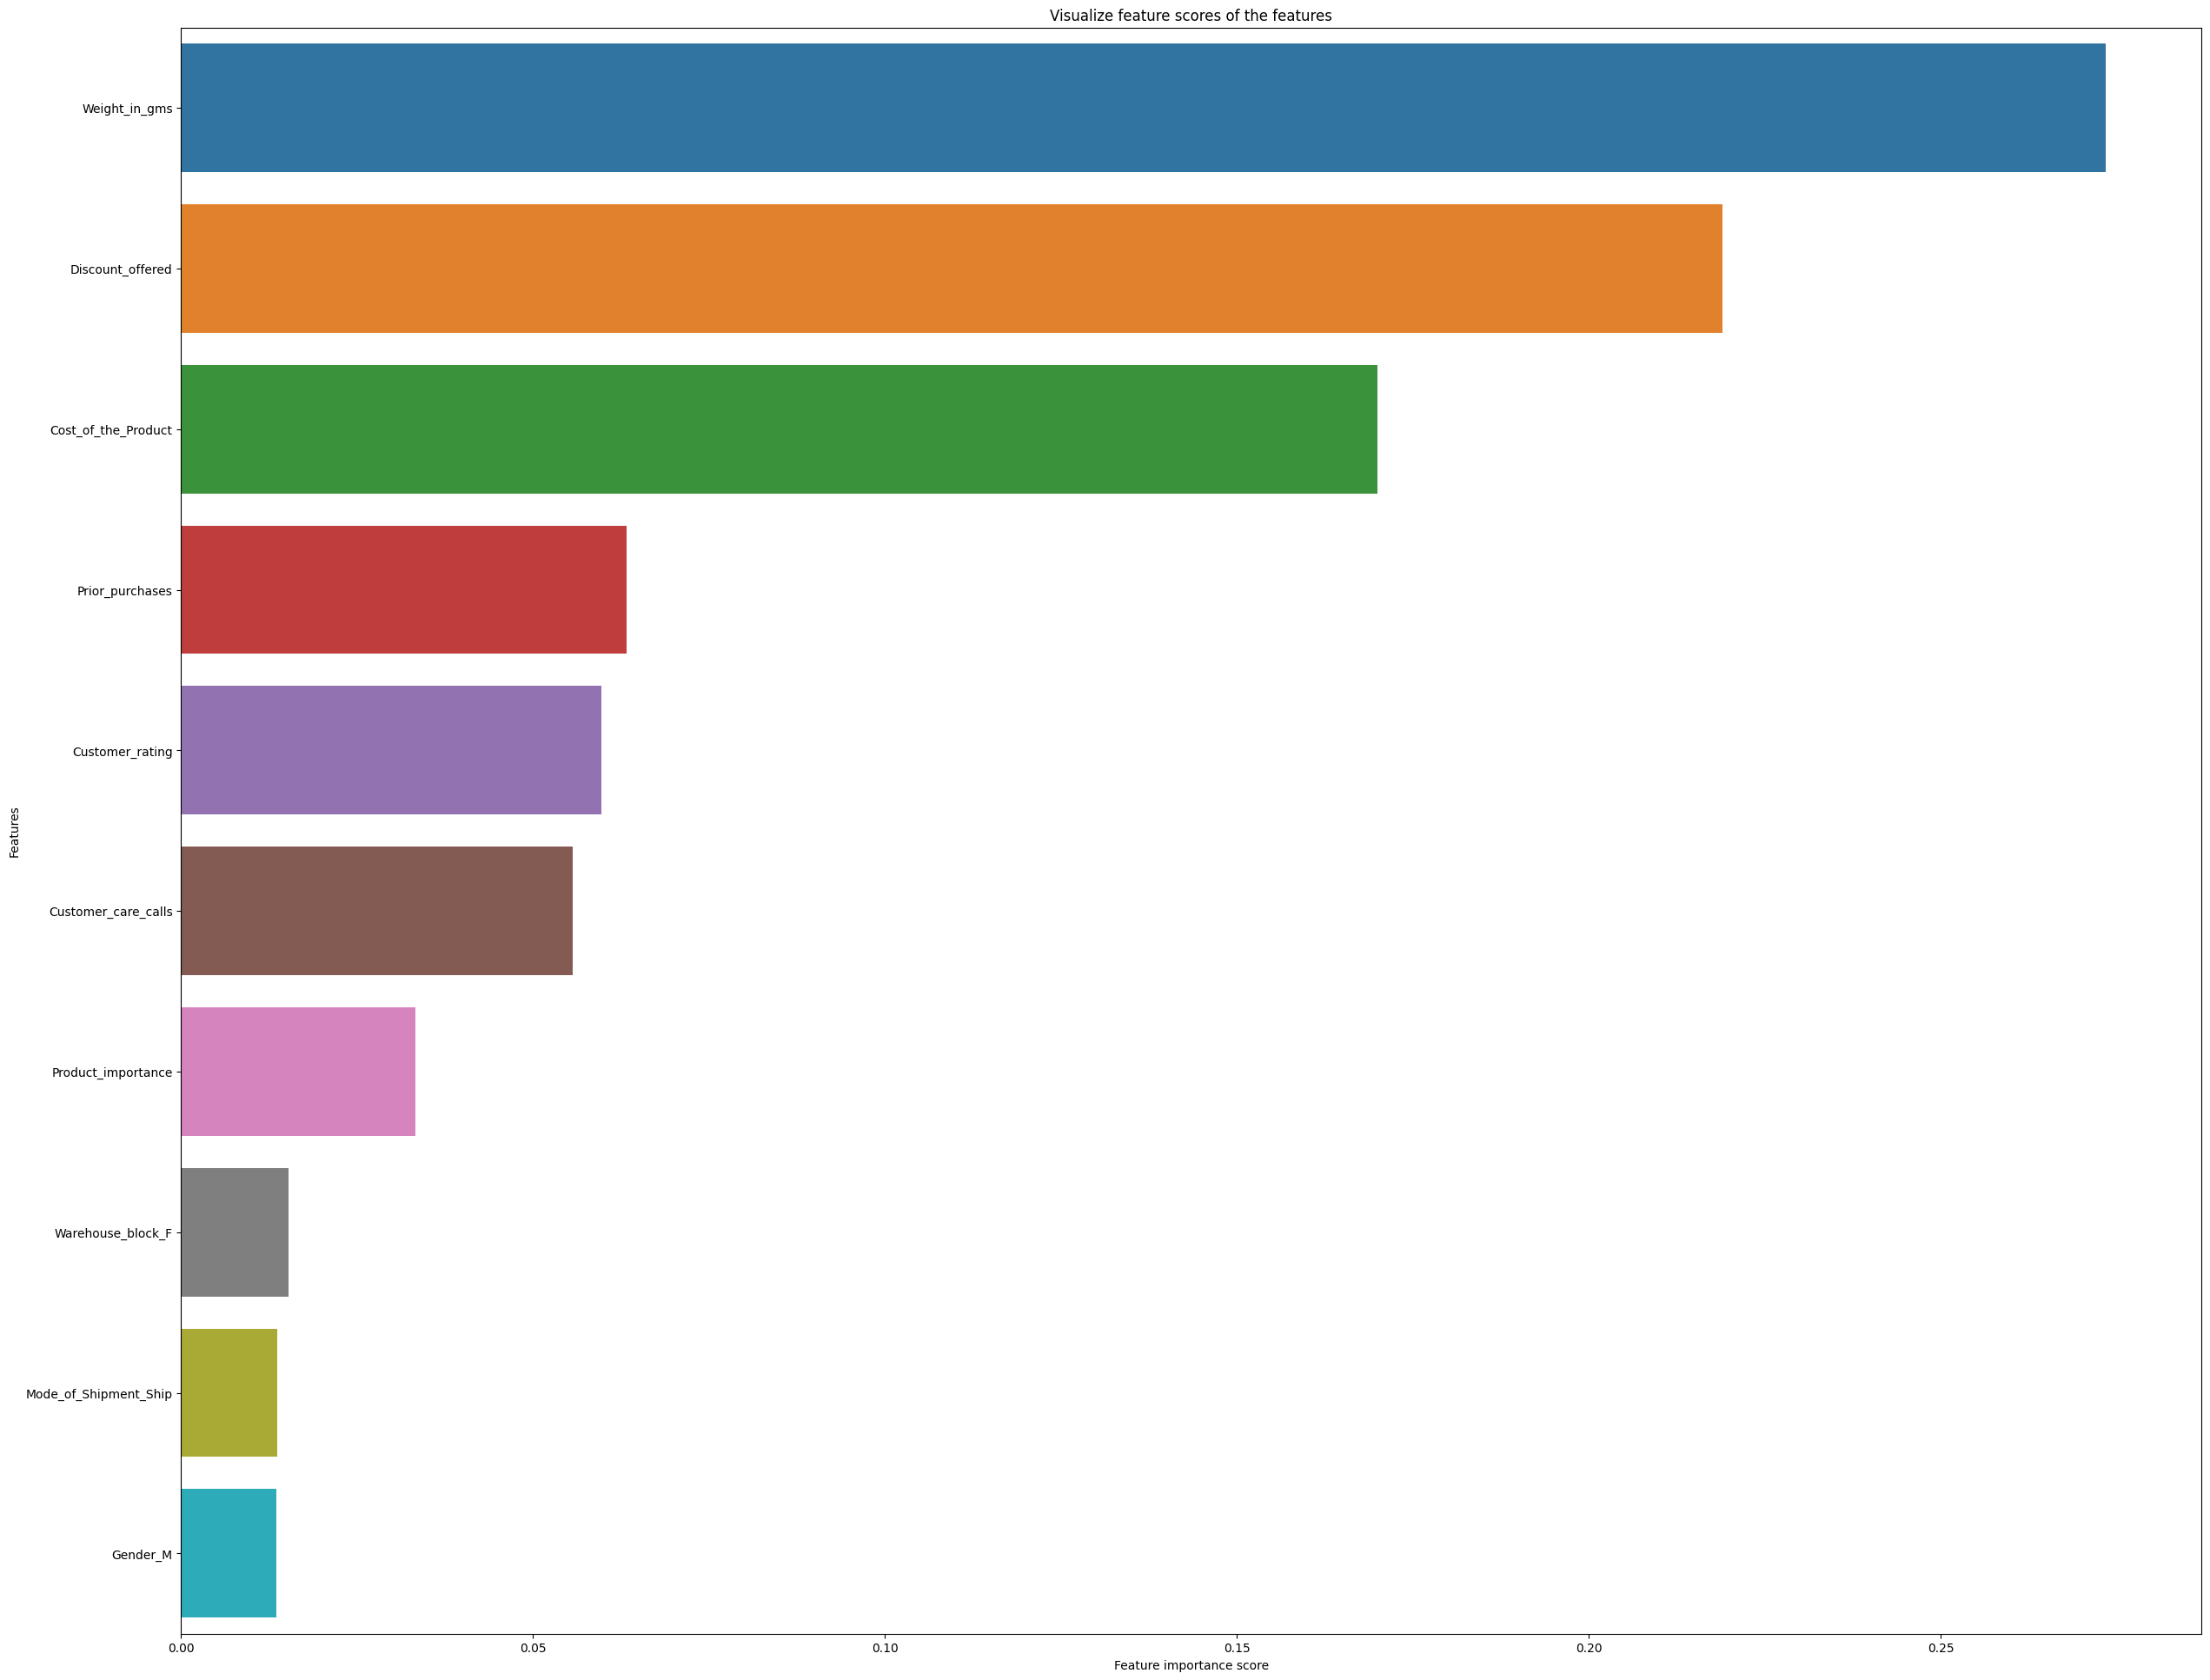

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:10], y=feature_scores.index[:10])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
drop_list = ['Gender', 'ID']
df2.drop(drop_list, axis = 1, inplace = True)

In [ ]:
x1 = df2.drop(['Reached.on.Time_Y.N'], axis = 1)
y1 = df2['Reached.on.Time_Y.N']

In [ ]:
train_x4, test_x4, train_y4, test_y4 = train_test_split(x1, y1, random_state = 69, stratify = y1)

In [ ]:
train_num1 = train_x4.select_dtypes(include = 'number')
train_cat1 = train_x4.select_dtypes(include = 'object')

test_num1 = test_x4.select_dtypes(include = 'number')
test_cat1 = test_x4.select_dtypes(include = 'object')

In [ ]:
print('Missing values before imputation \n', train_num1.isnull().sum())
train_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num1.isnull().sum())

Missing values before imputation 
 Customer_care_calls    0
Cost_of_the_Product    5
Prior_purchases        0
Discount_offered       2
Weight_in_gms          0
dtype: int64


Missing values after imputation 
 Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [ ]:
print('Missing values before imputation \n', train_cat1.isnull().sum())
train_cat1.fillna(train_cat1.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat1.isnull().sum())

Missing values before imputation 
 Warehouse_block       3
Mode_of_Shipment      2
Customer_rating       3
Product_importance    3
dtype: int64


Missing values after imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
dtype: int64


In [ ]:
print('Missing values before imputation \n', test_cat1.isnull().sum())
test_cat1.fillna(train_cat1.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat1.isnull().sum())


Missing values before imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       1
Product_importance    1
dtype: int64


Missing values after imputation 
 Warehouse_block       0
Mode_of_Shipment      0
Customer_rating       0
Product_importance    0
dtype: int64


In [ ]:
print('Missing values before imputation \n', test_num1.isnull().sum())
test_num1.fillna(train_num1.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num1.isnull().sum())

Missing values before imputation 
 Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


Missing values after imputation 
 Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [ ]:
train_num1.reset_index(inplace = True, drop = True)
train_cat1.reset_index(inplace = True, drop = True)
test_num1.reset_index(inplace = True, drop = True)
test_cat1.reset_index(inplace = True, drop = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train_y4)
train_y4 = enc.transform(train_y4)
test_y4 = enc.transform(test_y4)

In [ ]:
train_ord_features1 = train_cat1[['Customer_rating', 'Product_importance']]
test_ord_features1 = test_cat1[['Customer_rating', 'Product_importance']]

In [ ]:
train_nom_features1 = train_cat1.drop(['Customer_rating', 'Product_importance'], axis = 1)
test_nom_features1 = test_cat1.drop(['Customer_rating', 'Product_importance'], axis = 1)

In [ ]:
train_ord_features1

,Customer_rating,Product_importance
0,ok,low
1,ok,medium
2,excellent,high
3,bad,medium
4,excellent,medium
...,...,...
8244,ok,low
8245,excellent,low
8246,bad,low
8247,good,medium


In [ ]:
train_nom_features1

,Warehouse_block,Mode_of_Shipment
0,B,Ship
1,F,Ship
2,B,Flight
3,A,Ship
4,D,Ship
...,...,...
8244,A,Ship
8245,F,Ship
8246,F,Ship
8247,F,Ship


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# ordinal = OrdinalEncoder(categories = [['worst', 'bad', 'ok', 'good', 'excellent']])
# train_cat['Customer_rating'] = ordinal.fit_transform(train_cat[['Customer_rating']])
# test_cat['Customer_rating'] = ordinal.transform(test_cat[['Customer_rating']])

ordinal1 = OrdinalEncoder(categories = [['worst', 'bad', 'ok', 'good', 'excellent'], ['low', 'medium', 'high']])
ordinal1.fit(train_ord_features1[['Customer_rating', 'Product_importance']])
train_ord_features1[['Customer_rating', 'Product_importance']] = ordinal1.transform(train_ord_features1[['Customer_rating', 'Product_importance']])
test_ord_features1[['Customer_rating', 'Product_importance']] = ordinal1.transform(test_ord_features1[['Customer_rating', 'Product_importance']])

In [ ]:
train_ord_features1

,Customer_rating,Product_importance
0,2.0,0.0
1,2.0,1.0
2,4.0,2.0
3,1.0,1.0
4,4.0,1.0
...,...,...
8244,2.0,0.0
8245,4.0,0.0
8246,1.0,0.0
8247,3.0,1.0


In [ ]:
ohe1 = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
ohe1.fit(train_nom_features1)
train_nom_features1 = pd.DataFrame(ohe1.transform(train_nom_features1), columns = ohe1.get_feature_names_out())
test_nom_features1 = pd.DataFrame(ohe1.transform(test_nom_features1), columns = ohe1.get_feature_names_out())

In [ ]:
train_nom_features1

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8245,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8246,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8247,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
train_cat1 = pd.concat([train_ord_features1, train_nom_features1], axis = 1)
test_cat1 = pd.concat([test_ord_features1, test_nom_features1], axis = 1) 

In [ ]:
train_num1

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,173.0,2,10.0,1179
1,3,134.0,3,8.0,4950
2,2,157.0,6,17.0,1764
3,4,183.0,3,12.0,3646
4,6,176.0,4,31.0,1262
...,...,...,...,...,...
8244,3,137.0,4,6.0,4803
8245,4,135.0,3,3.0,4760
8246,6,164.0,4,6.0,5264
8247,4,209.0,2,3.0,4407


In [ ]:
train_x5 = pd.concat([train_num1, train_cat1], axis = 1)
test_x5 = pd.concat([test_num1, test_cat1], axis = 1) 

In [ ]:
train_x5

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Customer_rating,Product_importance,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,4,173.0,2,10.0,1179,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,134.0,3,8.0,4950,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,157.0,6,17.0,1764,4.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,183.0,3,12.0,3646,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,176.0,4,31.0,1262,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,3,137.0,4,6.0,4803,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8245,4,135.0,3,3.0,4760,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8246,6,164.0,4,6.0,5264,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8247,4,209.0,2,3.0,4407,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(train_x5)
train_x5 = pd.DataFrame(scaler1.transform(train_x5), columns = train_x5.columns)
test_x5 = pd.DataFrame(scaler1.transform(test_x5), columns = test_x5.columns)

In [ ]:
train_x5.isnull().sum()

Customer_care_calls        0
Cost_of_the_Product        0
Prior_purchases            0
Discount_offered           0
Weight_in_gms              0
Customer_rating            0
Product_importance         0
Warehouse_block_A          0
Warehouse_block_B          0
Warehouse_block_C          0
Warehouse_block_D          0
Warehouse_block_F          0
Mode_of_Shipment_Flight    0
Mode_of_Shipment_Road      0
Mode_of_Shipment_Ship      0
dtype: int64

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

model7 = LogisticRegression()
model8 = DecisionTreeClassifier(random_state = 69, criterion = 'gini', max_depth = 6)
model9 = RandomForestClassifier(random_state = 69, max_depth= 6, n_estimators= 100) 
model10 = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
model11 = xgb.XGBClassifier(eta = 0.1, max_depth = 3, n_estimators = 10)

In [ ]:
model7.fit(train_x5, train_y4)
pred7 = model7.predict(test_x5)

c_matrix7 = confusion_matrix(test_y4, pred7)
acc7 = accuracy_score(test_y4, pred7)

print('confusion matrix is: \n', c_matrix7, 'and accuracy is: \n', acc7)

confusion matrix is: 
 [[ 644  465]
 [ 526 1115]] and accuracy is: 
 0.6396363636363637


In [ ]:
model8.fit(train_x5, train_y4)
pred8 = model8.predict(test_x5)

c_matrix8 = confusion_matrix(test_y4, pred8)
acc8 = accuracy_score(test_y4, pred8)

print('confusion matrix is: \n', c_matrix8, 'and accuracy is: \n', acc8)

confusion matrix is: 
 [[1063   46]
 [ 843  798]] and accuracy is: 
 0.6767272727272727


In [ ]:
model9.fit(train_x5, train_y4)
pred9 = model9.predict(test_x5)

c_matrix9 = confusion_matrix(test_y4, pred9)
acc9 = accuracy_score(test_y4, pred9)

print('confusion matrix is: \n', c_matrix9, 'and accuracy is: \n', acc9)

confusion matrix is: 
 [[981 128]
 [776 865]] and accuracy is: 
 0.6712727272727272


In [ ]:
model10.fit(train_x5, train_y4)
pred10 = model10.predict(test_x5)

c_matrix10 = confusion_matrix(test_y4, pred10)
acc10 = accuracy_score(test_y4, pred10)

print('confusion matrix is: \n', c_matrix10, 'and accuracy is: \n', acc10)

confusion matrix is: 
 [[ 680  429]
 [ 556 1085]] and accuracy is: 
 0.6418181818181818


In [ ]:
model11.fit(train_x5, train_y4)
pred11 = model11.predict(test_x5)

c_matrix11 = confusion_matrix(test_y4, pred11)
acc11 = accuracy_score(test_y4, pred11)

print('confusion matrix is: \n', c_matrix11, 'and accuracy is: \n', acc11)

confusion matrix is: 
 [[1058   51]
 [ 841  800]] and accuracy is: 
 0.6756363636363636


In [ ]:
prec = precision_score(test_y4, pred11)
recall = recall_score(test_y4, pred11)
f1 = f1_score(test_y4, pred11)
print('precision, recall and f1 score are: \n', prec, recall, f1)

precision, recall and f1 score are: 
 0.9400705052878966 0.4875076173065204 0.6420545746388443


PREDICTION

In [ ]:
client_data = [['D', 'Ship', 9, 'worst', 299, 1, 'high', 5, 2999]]
client_df = pd.DataFrame(client_data, columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',	'Prior_purchases',	'Product_importance',	'Discount_offered', 'Weight_in_gms'])

In [ ]:
client_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,D,Ship,9,worst,299,1,high,5,2999


In [ ]:
client_num = client_df.select_dtypes(include = 'number')
client_cat = client_df.select_dtypes(include = 'object')

In [ ]:
client_cat_ord = client_cat[['Customer_rating', 'Product_importance']]
client_cat_nom = client_cat.drop(['Customer_rating', 'Product_importance'], axis = 1)

In [ ]:
client_cat_ord[['Customer_rating', 'Product_importance']] = ordinal1.transform(client_cat_ord[['Customer_rating', 'Product_importance']])
client_cat_nom = pd.DataFrame(ohe1.transform(client_cat_nom), columns = ohe1.get_feature_names_out())

In [ ]:
client_cat1 = pd.concat([client_cat_ord, client_cat_nom], axis = 1)
client_df1 = pd.concat([client_num, client_cat1], axis = 1)

In [ ]:
client_df1

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Customer_rating,Product_importance,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,9,299,1,5,2999,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
client_df1 = pd.DataFrame(scaler1.transform(client_df1), columns = client_df1.columns)

In [ ]:
client_df1

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Customer_rating,Product_importance,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1.4,0.948598,-0.125,0.0625,0.291892,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
client_pred = model11.predict(client_df1)

In [ ]:
client_pred

array([1])

In [ ]:
if client_pred == 1:
  print('yes')
else:
  print('no')

yes
